# Proof of Concept

In [1]:
import pandas as pd

from abtesting import display_ab_test_results

In [2]:
experiment = pd.DataFrame({
    'group': ['control', 'treatment A', 'treatment B'],
    'conversion': [478, 532, 430],
    'total': [5323, 5277, 5241]
})
experiment

,group,conversion,total
0,control,478,5323
1,treatment A,532,5277
2,treatment B,430,5241


Comparison,Confidence,Relative Increase
treatment A converts higher than control,97.0%,12.27%
treatment B converts lower than control,97.0%,-8.63%


Group,Conversion,Total,Observed Rate
control,478,5323,8.98%
treatment A,532,5277,10.08%
treatment B,430,5241,8.20%


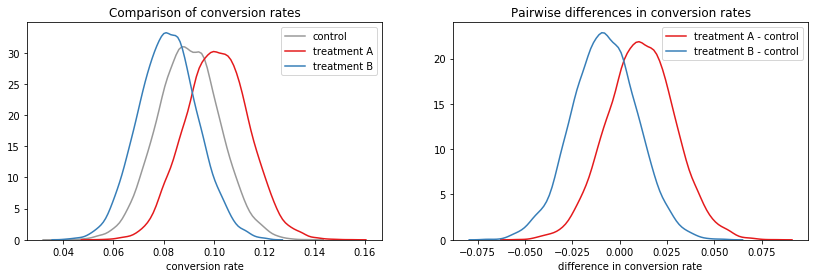

In [3]:
display_ab_test_results(experiment)